# HW5: Prob 1: Create a 2D embedding of the CIFAR-10 comparing different manifold learning algorithms

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is not that unlike the MNIST data set in that it is is 6K instances of small images. Unlike MNIST they are color images which are 32x32x3 (32 pixels wide, 32 pixels high, 3 color channels). The 3 color channels are red, green and blue. Each pixel is represented by a number between 0 and 255. The data set is divided into 10 classes. The classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. The data set is available in the keras.datasets module. You can load it with the following code:

```python
from torchvision.datasets import CIFAR10
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())
```

Your goal is to compare different manifold learning algorithms on this data set. You should use the following algorithms:

* Principle Component Analysis
* Isomap Embedding
* Locally Linear Embedding
* Multidimensional scaling.
* SpectralEmbedding
* T-distributed Stochastic Neighbor Embedding

All of these algorithms are available in the sklearn library. In addition you should use also try the UMAP algorithm which is available for python as a library [umap](https://umap-learn.readthedocs.io/en/latest/basic_usage.html). In each of these cases you should project the data into 2D and color the data by the class in which it belongs.

Two references which might help the [sklearn documentation](https://scikit-learn.org/stable/modules/manifold.html) and Jake Vanderplas' book [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html).

Practice creating a well formatted Jupyter notebook. You should have a title, a description of the data set, a description of the algorithms, a description of the results, and a discussion of the results. You should also have a conclusion. Your notebook should not have lots of code cells with no explanation. It should also not have lots of text outputs. You may need that during your development but by the time you submit, please clean it up.


In [27]:
%pip install torchvision
%pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=7100abb74bc32e53fadc329ec437f1288503bc13265cfd9ca14e2568cfc0c959
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


**Objective:**
Comparison of different manifold learning algorithms on this data set.

- Principle Component Analysis
- Isomap Embedding
- Locally Linear Embedding
- Multidimensional scaling.
- SpectralEmbedding
- T-distributed Stochastic Neighbor Embedding





**Dataset**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. (https://www.cs.toronto.edu/~kriz/cifar.html)

**Data Preprocessing**

To manage the dataset's size and computational demands, loading CIFAR-10 using torchvision.datasets and focusing on a subset of 2,000 images for applying manifold learning algorithms. This approach balances the need for meaningful analysis with practical considerations of memory usage and processing time.

In [4]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
dataset = CIFAR10(root='data/', download=True, transform= ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform= ToTensor())

100%|██████████| 170498071/170498071 [00:03<00:00, 42644008.13it/s]


Extracting data/cifar-10-python.tar.gz to data/


In [28]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
from umap import UMAP

For an initial Exploratory Data Analysis (EDA) on the CIFAR-10 dataset,I'll start with some basic visualizations and statistics to understand the data. This involves showing a few sample images, checking the balance of classes, and understanding the image format. Here's a basic outline of the steps in code:

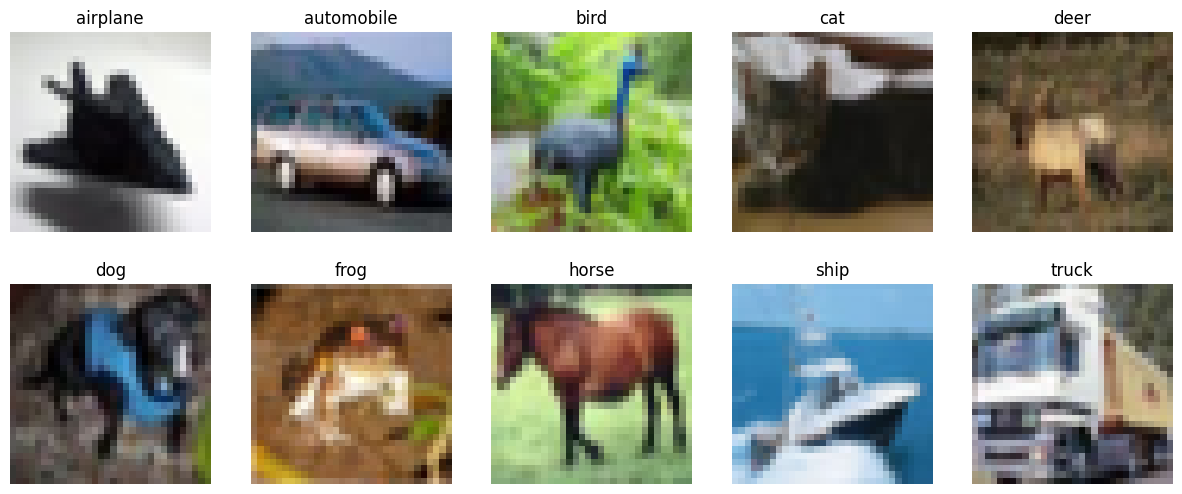

{'airplane': 5000, 'automobile': 5000, 'bird': 5000, 'cat': 5000, 'deer': 5000, 'dog': 5000, 'frog': 5000, 'horse': 5000, 'ship': 5000, 'truck': 5000}


In [6]:
# Sample and visualize some images from each class
classes = dataset.classes
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    idx = [j for j, y in enumerate(dataset.targets) if y == i][0]
    ax[i//5, i%5].imshow(dataset.data[idx])
    ax[i//5, i%5].set_title(classes[i])
    ax[i//5, i%5].axis('off')
plt.show()

# Check the balance of classes
class_counts = {class_name:0 for class_name in classes}
for _, label in dataset:
    class_counts[classes[label]] += 1
print(class_counts)

In [10]:
CIFAR_data = np.array([dataset[i][0].numpy().flatten() for i in range(len(dataset))])
labels = np.array([dataset[i][1] for i in range(len(dataset))])

samples = 3000
indices = np.random.choice(len(CIFAR_data), samples, replace=False)
data_subset = CIFAR_data[indices]
labels_subset = labels[indices]

In [24]:

# Standardize the data
mean = np.mean(data_subset, axis=0)
std_dev = np.std(data_subset, axis=0)
data_subset_standardized = (data_subset - mean) / std_dev


In [39]:
# Applying function to plot the 2D embeddings instead of plotting 7 times individually
def plot_embedding(embedding, labels, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Set1', alpha=0.6)
    plt.legend(handles=scatter.legend_elements()[0], labels=[dataset.classes[i] for i in range(10)])
    plt.title(title)
    plt.show()

**PCA**

Principal Component Analysis (PCA) is a technique used to reduce the dimensionality of a dataset while preserving its essential structure by identifying and representing the most significant patterns or features in the data.


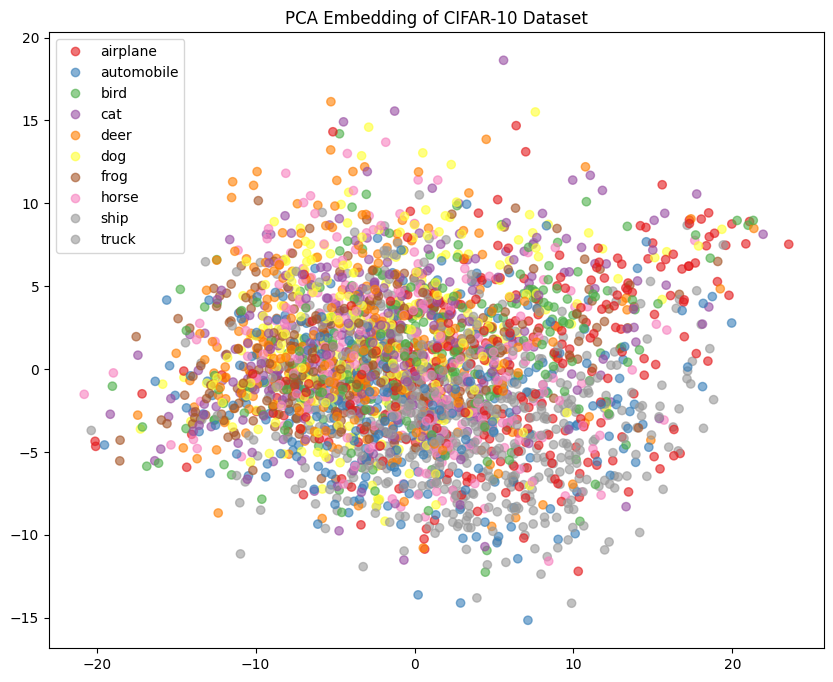

In [43]:
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(data_subset)
plot_embedding(pca_embedding, labels_subset, 'PCA Embedding of CIFAR-10 Dataset')

**Isomap Embedding**

Isomap is a method for reducing the dimensionality of data that maintains the distances between data points along the manifold, considering the underlying geometric structure or shape of the data.

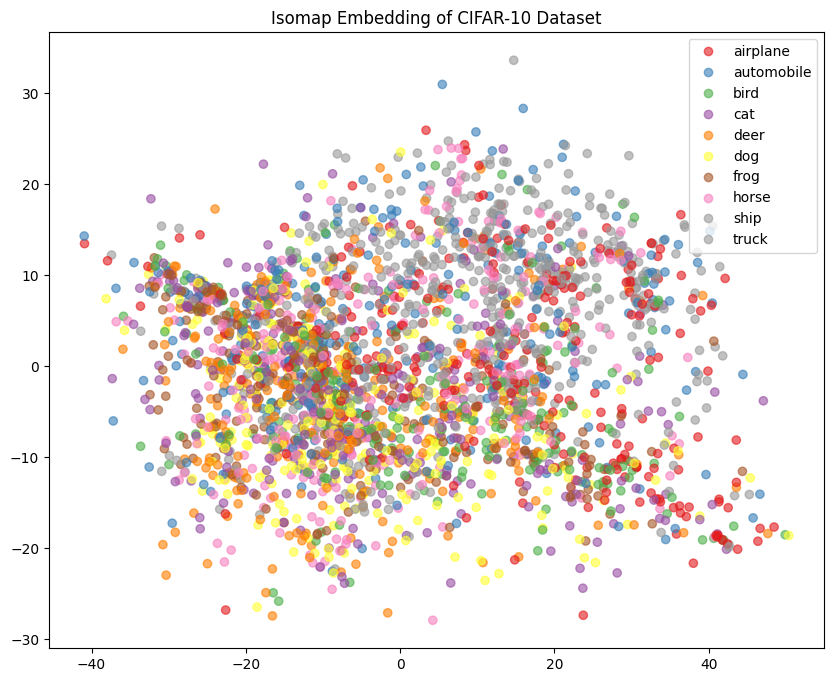

In [44]:
isomap = Isomap(n_components=2)
isomap_embedding = isomap.fit_transform(data_subset)
plot_embedding(isomap_embedding, labels_subset, 'Isomap Embedding of CIFAR-10 Dataset')

**Locally Linear Embedding (LLE)**

LLE is a method in nonlinear dimensionality reduction that maintains local relationships by reconstructing individual data points through linear combinations of their neighboring points.


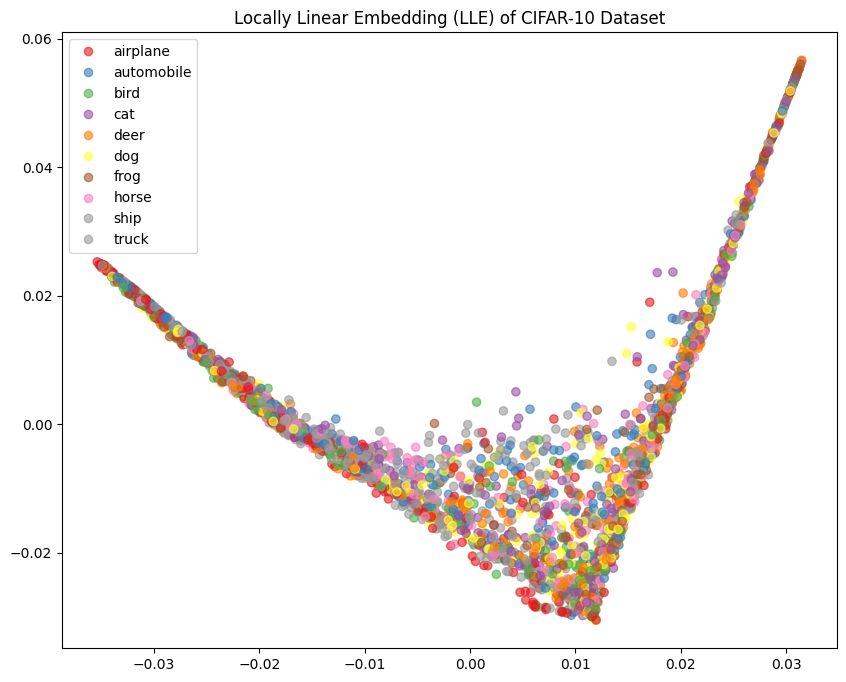

In [47]:
LLE = LocallyLinearEmbedding(n_components=2)
LLE_embedding = lle.fit_transform(data_subset)
plot_embedding(lle_embedding, labels_subset, 'Locally Linear Embedding (LLE) of CIFAR-10 Dataset')

**MDS**

MDS is a method used to position data points within a lower-dimensional space while striving to maintain the relative distances between pairs of points as accurately as feasible.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


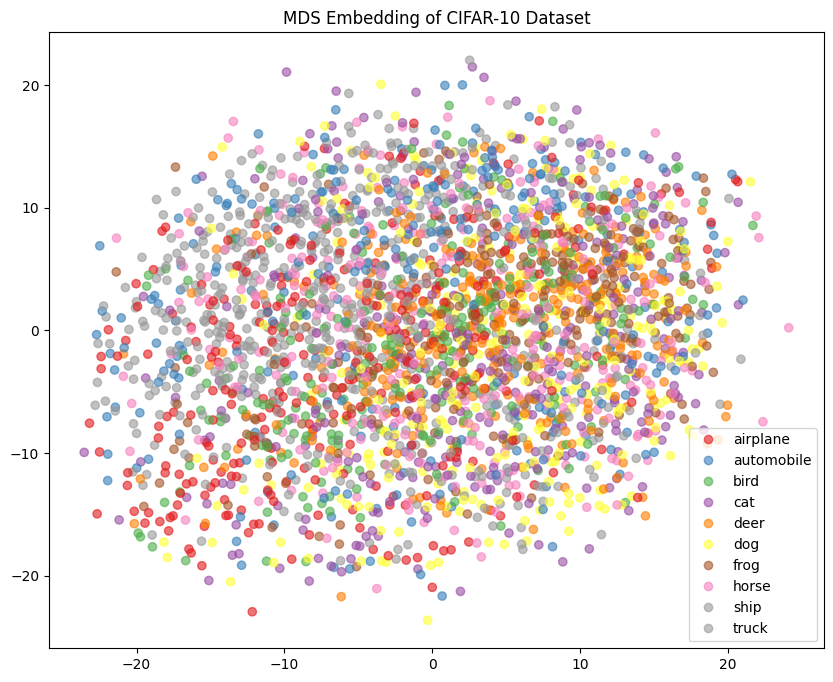

In [48]:
mds_data = MDS(n_components=2)
MDS_embedding = mds_data.fit_transform(data_subset)
plot_embedding(MDS_embedding, labels_subset, 'MDS Embedding of CIFAR-10 Dataset')

**t-SNE**

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used nonlinear method, especially effective for visualizing datasets with high dimensionality.

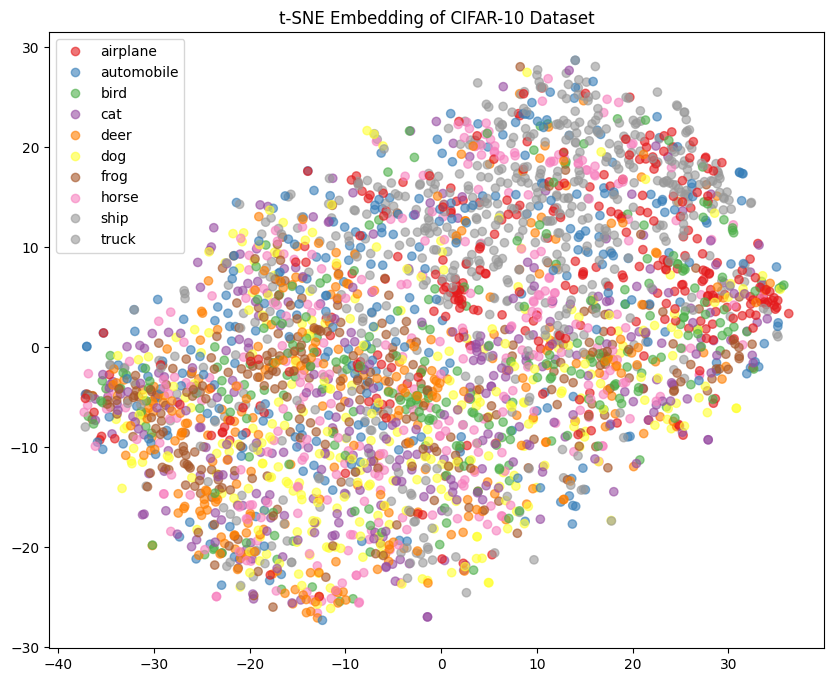

In [49]:
tSNE = TSNE(n_components=2)
tSNE_embedding = tSNE.fit_transform(data_subset)
plot_embedding(tSNE_embedding, labels_subset, 't-SNE Embedding of CIFAR-10 Dataset')

**UMAP**

UMAP is a modern nonlinear method for reducing dimensionality, known for its ability to retain both local and global data structures effectively.

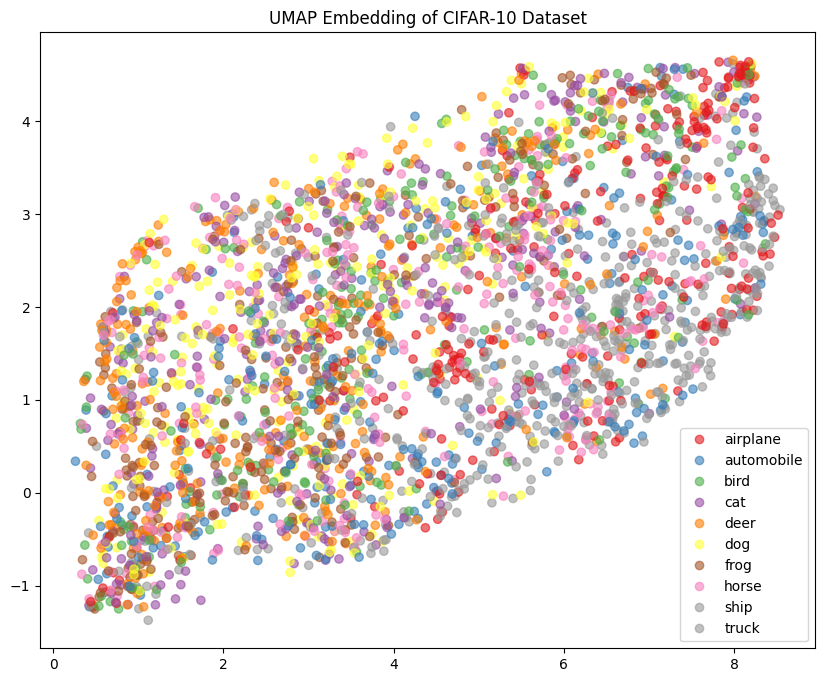

In [50]:
UMAP_embedding = UMAP(n_components=2).fit_transform(data_subset)
plot_embedding(UMAP_embedding, labels_subset, 'UMAP Embedding of CIFAR-10 Dataset')

Conclusion:

In this analysis, a range of manifold learning algorithms was applied to visualize the CIFAR-10 dataset in two dimensions. Each algorithm showcased unique strengths and limitations, with the choice often dictated by dataset characteristics and analysis goals. For instance, while PCA offers simplicity and speed, its linear nature might overlook complex nonlinear relationships in the data. On the other hand, nonlinear techniques like t-SNE and UMAP excel at capturing local structures, albeit at the cost of increased computational demands and sensitivity to hyperparameters. Overall, manifold learning proves invaluable for dimensionality reduction and providing insights into high-dimensional datasets, offering a variety of perspectives on the dataset's underlying structure. Future research could explore alternative techniques, fine-tune parameter settings, or extend analyses to different datasets for further insights.






